### Exercício 9 realizado por Alícia Gouveia e Sofia Rodrigues

Using the dataset in EFIplus_medit.zip:

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pdpbox import pdp
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage as linkage_function
from sklearn.preprocessing import StandardScaler

In [2]:
#Load the dataset
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

df

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Drop NaN values
df = df.dropna()

# Display the column names (header names) of the dataset
print(df.columns.tolist())

df

['Site_code', 'Latitude', 'Longitude', 'Country', 'Catchment_name', 'Galiza', 'Subsample', 'Calib_EFI_Medit', 'Calib_connect', 'Calib_hydrol', 'Calib_morphol', 'Calib_wqual', 'Geomorph1', 'Geomorph2', 'Geomorph3', 'Water_source_type', 'Flow_regime', 'Altitude', 'Geological_typology', 'Actual_river_slope', 'Natural_sediment', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul', 'Barriers_catchment_down', 'Barriers_river_segment_up', 'Barriers_river_segment_down', 'Barriers_number_river_segment_up', 'Barriers_number_river_segment_down', 'Barriers_distance_river_segment_up', 'Barriers_distance_river_segment_down', 'Impoundment', 'Hydropeaking', 'Water_abstraction', 'Hydro_mod', 'Temperature_impact', 'Velocity_increase', 'Reservoir_flushing', 'Sedimentation', 'Channelisation', 'Cross_sec', 'Instream_habitat', 'Riparian_vegetation', 'Embankment', 'Floodprotection', 'Floodplain', 'Toxic_substances', 'Acidification', 'Water_quality_index', 'Eutrophication', 'Organic_p

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Run agglomerative cluster analysis using different linkage methods based on quantitative environmental variables (see previous exercise), using sites from the Douro and Tejo basins.

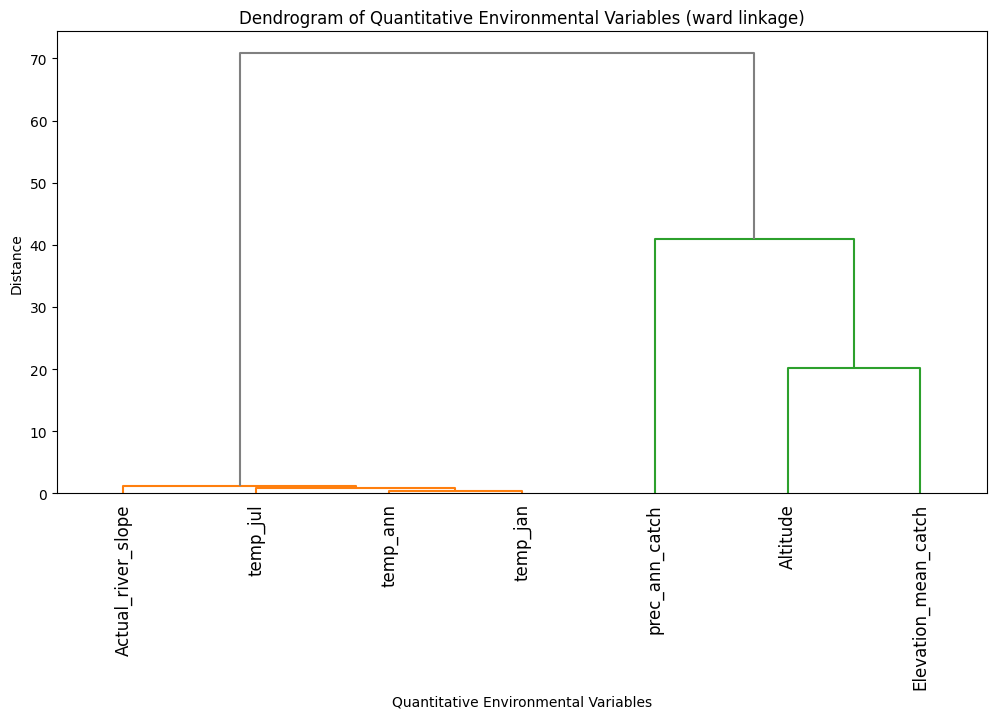

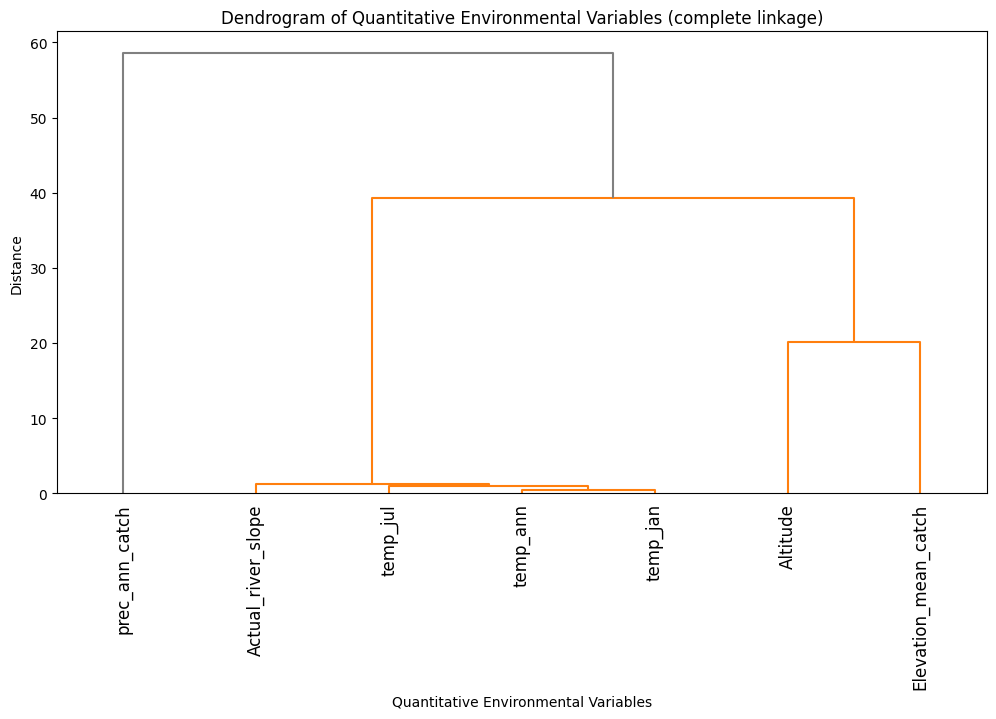

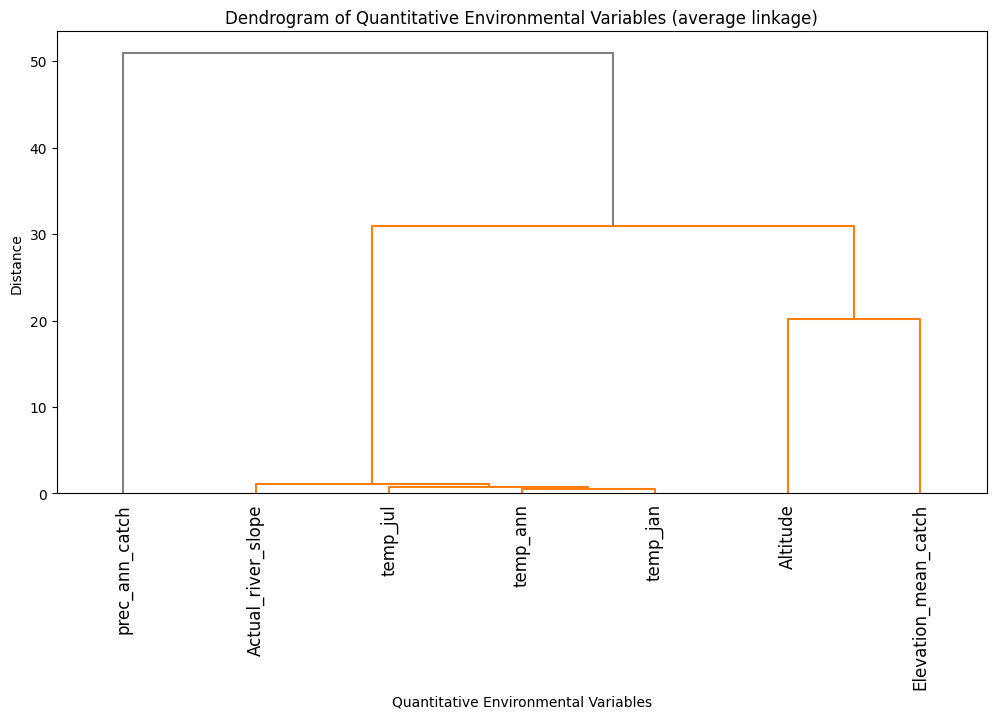

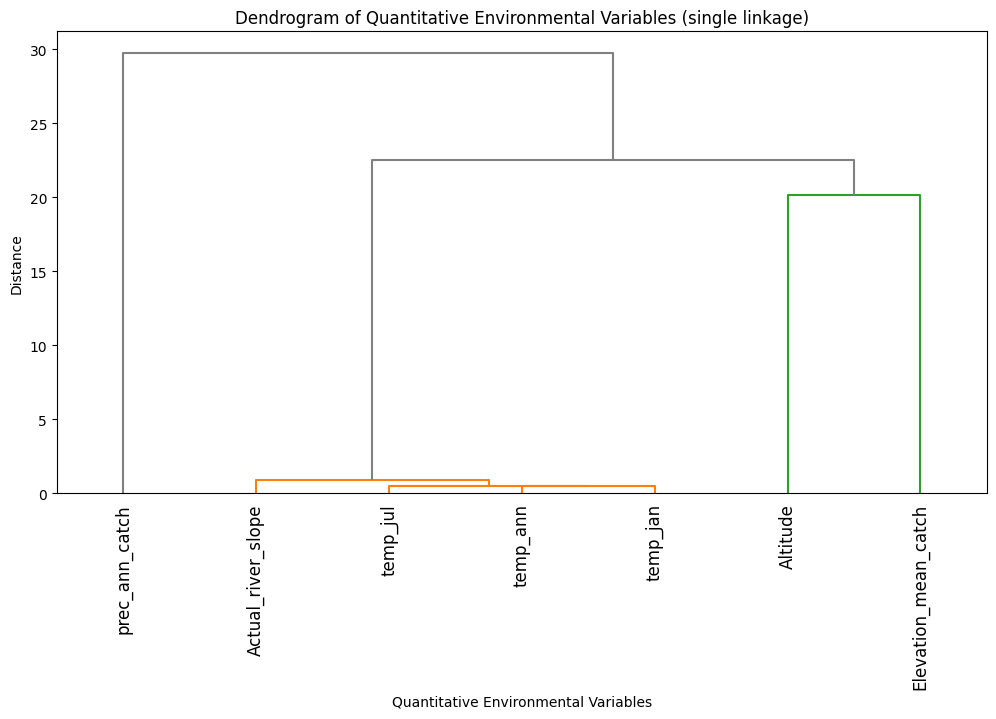

In [4]:
# Subset data for Douro and Tejo basins
douro_tejo_df = df[df['Catchment_name'].isin(['Douro', 'Tejo'])]

# Extract quantitative environmental variables
quant_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
X = douro_tejo_df[quant_vars]

# Transpose the DataFrame to group the columns
X_transposed = X.T

# Normalize the data
scaler = StandardScaler()
X_transposed_scaled = scaler.fit_transform(X_transposed)

# Perform agglomerative clustering with different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

for linkage_method in linkage_methods:
    # Calculate linkage matrix
    Z = linkage_function(X_transposed_scaled, method=linkage_method)
    
    # Plot dendrogram with cluster colors
    plt.figure(figsize=(12, 6))
    dendrogram(Z, labels=quant_vars, leaf_rotation=90, above_threshold_color='gray')
    plt.title(f'Dendrogram of Quantitative Environmental Variables ({linkage_method} linkage)')
    plt.xlabel('Quantitative Environmental Variables')
    plt.ylabel('Distance')
    plt.show()

Plot a heatmap and a dendrogram by clustering the rows (sites) using average linkage

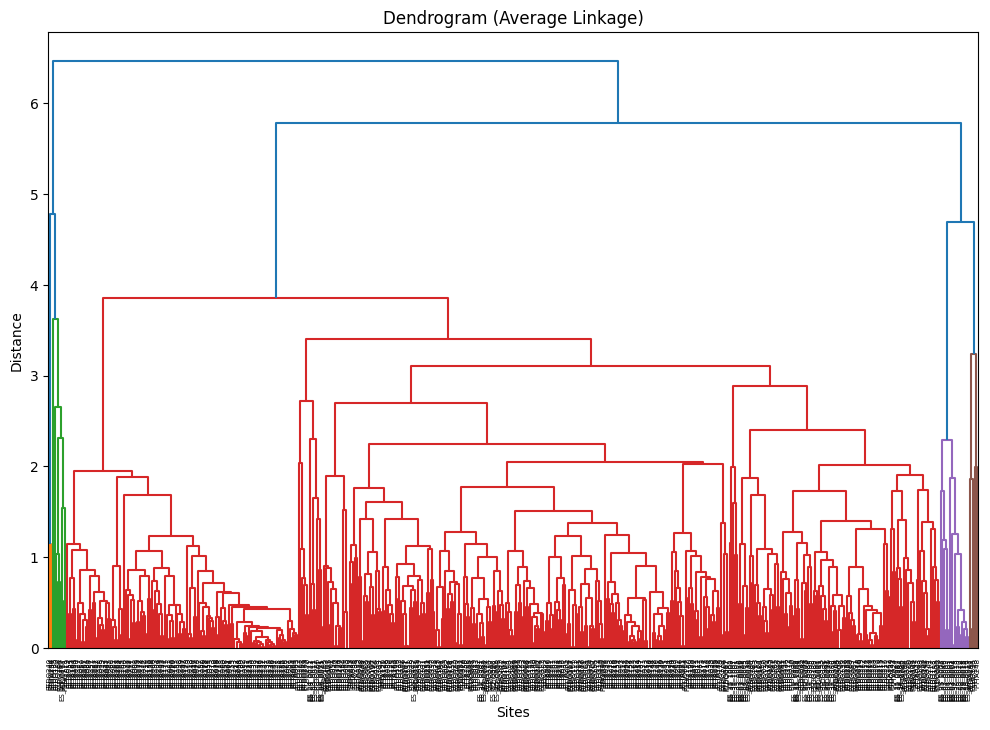

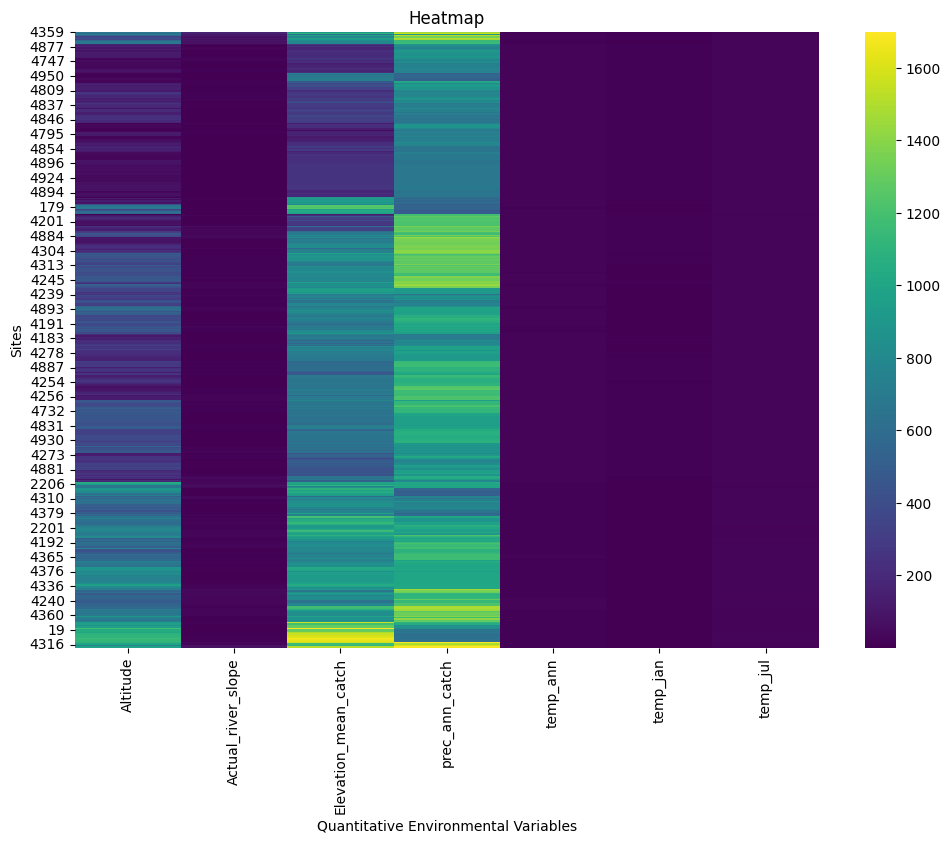

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Subset data for Douro and Tejo basins
douro_tejo_df = df[df['Catchment_name'].isin(['Douro', 'Tejo'])]

# Extract quantitative environmental variables
quant_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
X = douro_tejo_df[quant_vars]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate linkage matrix using average linkage
Z = linkage(X_scaled, method='average')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=douro_tejo_df['Site_code'].values, leaf_rotation=90)
plt.title('Dendrogram (Average Linkage)')
plt.xlabel('Sites')
plt.ylabel('Distance')
plt.show()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X.iloc[dendrogram(Z, no_plot=True)['leaves']], cmap='viridis')
plt.title('Heatmap')
plt.xlabel('Quantitative Environmental Variables')
plt.ylabel('Sites')
plt.show()


Plot a dendrogram that clusters the environmental variables instead (columns) using average inkage - discuss how this would help to select variables for e.g a regression-based analysis (NOTE: to transpose a dataframe use "name of the datarame".T)

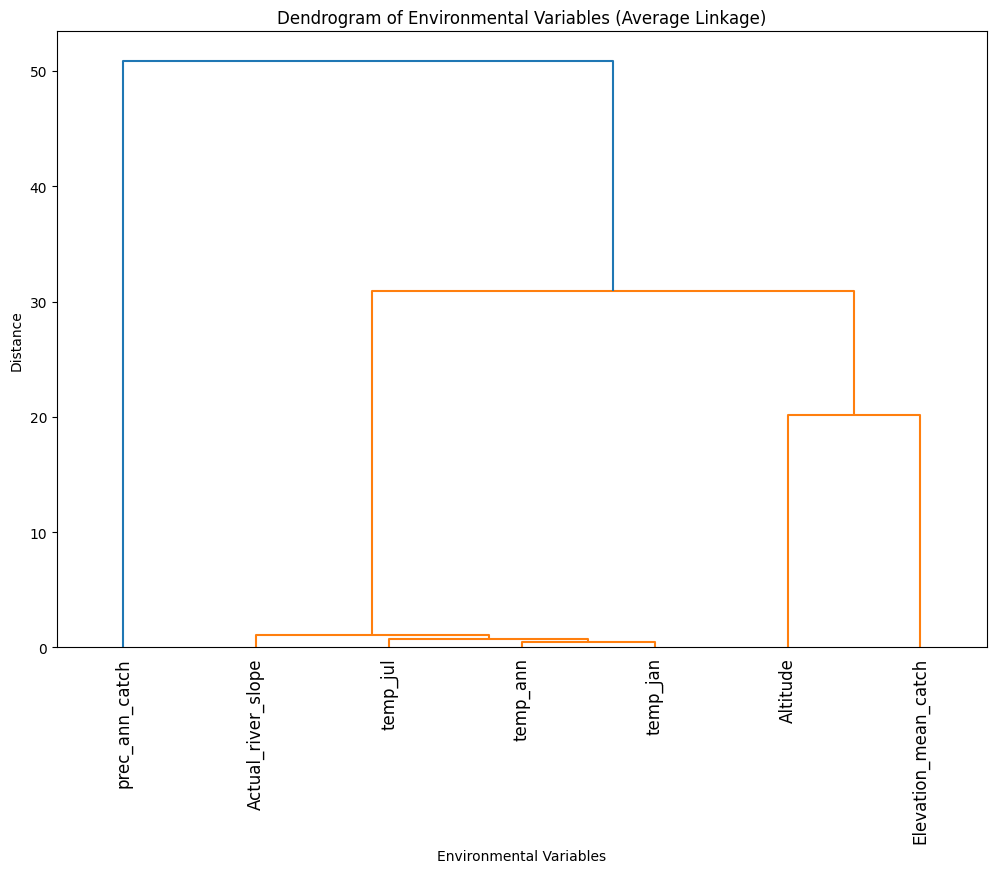

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Subset data for Douro and Tejo basins
douro_tejo_df = df[df['Catchment_name'].isin(['Douro', 'Tejo'])]

# Extract quantitative environmental variables
quant_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
X = douro_tejo_df[quant_vars]

# Normalize the data
scaler = StandardScaler()
X_transposed_scaled = scaler.fit_transform(X_transposed)

# Calculate linkage matrix using average linkage
Z = linkage(X_transposed_scaled, method='average')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=quant_vars, leaf_rotation=90)
plt.title('Dendrogram of Environmental Variables (Average Linkage)')
plt.xlabel('Environmental Variables')
plt.ylabel('Distance')
plt.show()
